In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_cleaned.csv')

In [3]:
df.shape

(215, 14)

In [4]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,0,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,0,79.33,0,78.33,0,2,77.48,2,1,86.5,2,66.28,1,200000.0
2,0,65.00,0,68.00,1,3,64.00,3,0,75.0,2,57.80,1,250000.0
3,0,56.00,0,52.00,1,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,0,85.80,0,73.60,1,1,73.30,3,0,96.8,2,55.50,1,425000.0


In [5]:
y = df['status']
X = df.drop(['status'], axis = 1)

# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)

Shape of the x : (215, 13)
Shape of the y : (215,)


In [6]:
cols = [ 
    'ssc_p',
    'hsc_p',
    'degree_p',
    'etest_p',
    'mba_p',
    'salary'
]
X[cols]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,265000.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[cols] =  sc.fit_transform(X[cols])
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,-0.028087,1,2.268812,0,1,-1.140102,2,0,-1.291091,1,-0.597647,-0.144570
1,0,1.113369,0,1.103448,0,2,1.513267,2,1,1.087157,2,0.687620,-1.041427
2,0,-0.213238,0,0.153313,1,3,-0.322843,3,0,0.218908,2,-0.769474,-0.400815
3,0,-1.046417,0,-1.318339,1,2,-1.957362,2,0,-0.460592,1,-0.489396,-0.208631
4,0,1.712332,0,0.668391,1,1,0.943909,3,0,1.864806,2,-1.164676,1.841328


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (172, 13)
Shape of the y Train : (172,)
Shape of the X test : (43, 13)
Shape of the y test : (43,)


In [11]:
from tpot import TPOTClassifier

In [12]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.9884033613445379
2.11 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=3, max_features=1.0, min_samples_leaf=17, min_samples_split=9, n_estimators=100, subsample=0.6500000000000001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=<ipykernel.iostream.OutStream object at 0x000001C82A95AD08>,
               max_eval_time_mins=5, max_time_mins=2, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [13]:
print(tpot.score(X_test, y_test))
print(tpot.score(X_test, y_test))

0.9534883720930233
0.9534883720930233


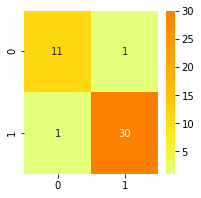

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.97      0.97      0.97        31

    accuracy                           0.95        43
   macro avg       0.94      0.94      0.94        43
weighted avg       0.95      0.95      0.95        43



In [16]:
y_pred = tpot.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 0.8953488372093024
Testing Accuracy : 0.8604651162790697


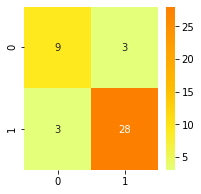

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)